In [0]:
import pandas as pd
import numpy as np

df=pd.read_csv('https://drive.google.com/u/0/uc?id=1vtDCOZIOBxkV-x_vkUvlezIX9ZH44bwo&export=download')

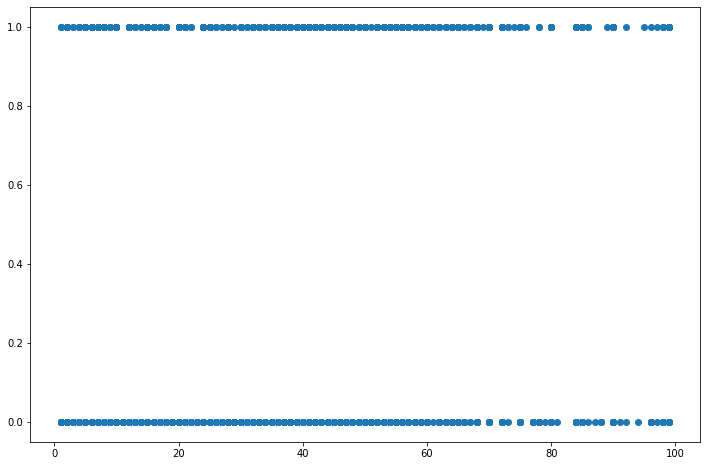

In [0]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(df['Jam per Minggu'],df['Gaji'])
plt.show()

In [0]:
df[df['Kelas Pekerja']=='Tidak Pernah Bekerja']=df[df['Kelas Pekerja']=='Tidak Pernah Bekerja'].replace(to_replace ="?", 
                 value ="Tidak Pernah Bekerja") 

In [0]:
df=df[df['Kelas Pekerja']!='?']
df=df[df['Pekerjaan']!='?']

In [0]:
#df[(df['Kelas Pekerja']=='?')&(df['Gaji']==1)]
#df[df['Kelas Pekerja']=='Tidak Pernah Bekerja']

obj_dict={'Wiraswasta':                       26589
Pekerja Bebas Bukan Perusahan     3072
Pemerintah Lokal                  2454
Pemerintah Negara                 1579
Pekerja Bebas Perusahaan          1345
Pemerintah Provinsi               1128
Tanpa di Bayar                      16
Tidak Pernah Bekerja 

In [0]:
kelas_pekerja_gaji_mean = df.groupby('Kelas Pekerja').Gaji.mean()
df['kelas_pekerja_gaji_enc'] = df['Kelas Pekerja'].map(kelas_pekerja_gaji_mean)

In [0]:
encoded_feature = df['kelas_pekerja_gaji_enc'].values
first_correlation = np.corrcoef(df['Gaji'].values, encoded_feature)[0][1]
print(first_correlation)

0.16649040464333892


In [0]:
df['kelas_pekerja_gaji_enc'].value_counts()

0.217270    26589
0.275716     3072
0.296251     2454
0.271691     1579
0.553903     1345
0.401596     1128
0.125000       16
0.000000        6
Name: kelas_pekerja_gaji_enc, dtype: int64

In [0]:
df['Kelas Pekerja'].value_counts()

Wiraswasta                       26589
Pekerja Bebas Bukan Perusahan     3072
Pemerintah Lokal                  2454
Pemerintah Negara                 1579
Pekerja Bebas Perusahaan          1345
Pemerintah Provinsi               1128
Tanpa di Bayar                      16
Tidak Pernah Bekerja                 6
Name: Kelas Pekerja, dtype: int64

In [0]:
df.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji,kelas_pekerja_gaji_enc
0,27247,59,Pemerintah Negara,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1,0.271691
1,1640,52,Wiraswasta,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0,0.217270
2,45206,52,Pekerja Bebas Bukan Perusahan,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1,0.275716
3,16154,45,Wiraswasta,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0,0.217270
4,43023,28,Wiraswasta,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1,0.217270


In [0]:
#obj_dict={'1st-4th':0,
 #        '5th-6th':1,
  #       'SD':2,
  #       '7th-8th':3,
   #      '9th':4,
   #      '10th':5,
 #        '11th':6,
 #        '12th':7,
  #       'SMA':8,
  #        'D3':9,
  #        'D4':10,
   #      'Pendidikan Tinggi':11,
    #      'Sarjana':12,
   #       'Sekolah Professional':13,
      #    'Master':14,
     #     'Doktor':15
       #  }

In [0]:
#df['Pendidikan']=df['Pendidikan'].replace(obj_dict)

In [0]:
pekerjaan_gaji_mean = df.groupby('Pekerjaan').Gaji.mean()
df['pekerjaan_gaji_enc'] = df['Pekerjaan'].map(pekerjaan_gaji_mean)

In [0]:
df['pekerjaan_gaji_enc'].value_counts()

0.450417    4911
0.473695    4790
0.222431    4788
0.142922    4408
0.269026    4323
0.039129    3859
0.129412    2380
0.206025    1859
0.065455    1650
0.114783    1150
0.291444    1122
0.306540     734
0.015152     198
0.363636      11
0.000000       6
Name: pekerjaan_gaji_enc, dtype: int64

In [0]:
df['Pekerjaan'].value_counts()



Spesialis                4911
Ekesekutif Managerial    4790
Perbaikan Kerajinan      4788
Pemuka Agama             4408
Sales                    4323
Servis Lainnya           3859
Mesin Inspeksi           2380
Supir                    1859
Pembersih                1650
Petani                   1150
Tech-support             1122
Penjaga                   734
Asisten Rumah Tangga      198
Tentara                    11
Tidak Pernah Bekerja        6
Name: Pekerjaan, dtype: int64

In [0]:
aencoded_feature = df['pekerjaan_gaji_enc'].values
first_correlation = np.corrcoef(df['Gaji'].values, encoded_feature)[0][1]
print(first_correlation)

0.16649040464333892


In [0]:
del df['Pendidikan']
del df['Pekerjaan']
del df['Kelas Pekerja']


In [0]:
df=pd.get_dummies(df,columns=['Status Perkawinan','Jenis Kelamin'])

In [0]:
del df['Status Perkawinan_Belum Pernah Menikah']
del df['Jenis Kelamin_Perempuan']
df

,id,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji,kelas_pekerja_gaji_enc,pekerjaan_gaji_enc,Status Perkawinan_Berpisah,Status Perkawinan_Cerai,Status Perkawinan_Janda,Status Perkawinan_Menikah,Status Perkawinan_Menikah LDR,Jenis Kelamin_Laki2
0,27247,59,139616,14,0.0,0.0,50.0,1,0.271691,0.473695,0,0,0,1,0,1
1,1640,52,158993,9,0.0,0.0,38.0,0,0.217270,0.039129,0,1,0,0,0,0
2,45206,52,284648,9,0.0,0.0,99.0,1,0.275716,0.473695,0,1,0,0,0,0
3,16154,45,132847,9,0.0,0.0,40.0,0,0.217270,0.065455,0,0,0,0,0,0
4,43023,28,103432,9,0.0,0.0,45.0,1,0.217270,0.206025,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38388,46220,47,148169,9,0.0,0.0,40.0,0,0.275716,0.222431,0,0,0,1,0,1
38389,33268,69,264722,12,0.0,0.0,40.0,1,0.553903,0.269026,0,0,0,1,0,1
38390,44845,24,31606,13,0.0,0.0,20.0,1,0.275716,0.450417,0,0,0,1,0,0
38391,4517,47,197836,9,0.0,0.0,45.0,0,0.217270,0.269026,0,0,0,1,0,1


In [0]:
df.isnull().values.any()

False

In [0]:
df['Gaji'].isnull().values.any()

False

In [0]:
df.describe()

,id,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji,kelas_pekerja_gaji_enc,pekerjaan_gaji_enc,Status Perkawinan_Berpisah,Status Perkawinan_Cerai,Status Perkawinan_Janda,Status Perkawinan_Menikah,Status Perkawinan_Menikah LDR,Jenis Kelamin_Laki2
count,36189.000000,36189.000000,3.618900e+04,36189.000000,3.618900e+04,3.618900e+04,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000
mean,23994.512255,38.600017,1.897966e+05,10.134461,1.567952e+07,1.226365e+06,40.967614,0.248142,0.248142,0.248142,0.031253,0.137970,0.028020,0.466882,0.013429,0.676449
std,13855.680403,13.204073,1.054169e+05,2.567513,1.063611e+08,5.641726e+06,11.998305,0.431940,0.071914,0.148246,0.174002,0.344873,0.165031,0.498909,0.115107,0.467837
min,0.000000,17.000000,1.349200e+04,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11999.000000,28.000000,1.177470e+05,9.000000,0.000000e+00,0.000000e+00,40.000000,0.000000,0.217270,0.129412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23999.000000,37.000000,1.785510e+05,10.000000,0.000000e+00,0.000000e+00,40.000000,0.000000,0.217270,0.222431,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,35986.000000,47.000000,2.377310e+05,13.000000,0.000000e+00,0.000000e+00,45.000000,0.000000,0.271691,0.450417,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,47991.000000,90.000000,1.490400e+06,16.000000,1.399986e+09,6.098400e+07,99.000000,1.000000,0.553903,0.473695,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
#from sklearn.preprocessing import normalize

X=df.drop(columns='Gaji')
#norm=normalize(X)
#norm_data=norm.fit_transform(X)
#norm_data.shape
#norm.shape


In [0]:
col_names=['id','Umur',
           'Berat Akhir',
           'Jmlh Tahun Pendidikan',
           'Keuntungan Kapital',
           'Kerugian Capital',
           'Jam per Minggu',
           'kelas_pekerja_gaji_enc',
           'pekerjaan_gaji_enc',
           'Status Perkawinan_Berpisah',
           'Status Perkawinan_Cerai',
           'Status Perkawinan_Janda',
           'Status Perkawinan_Menikah',
           'Status Perkawinan_Menikah LDR',
           'Jenis Kelamin_Laki2']
#norm_df=pd.DataFrame(norm_data,columns=col_names)
#norm_df
#norm_df=pd.DataFrame(norm,columns=col_names)
#norm_df

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=col_names)
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36189 entries, 0 to 36188
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             36189 non-null  float64
 1   Umur                           36189 non-null  float64
 2   Berat Akhir                    36189 non-null  float64
 3   Jmlh Tahun Pendidikan          36189 non-null  float64
 4   Keuntungan Kapital             36189 non-null  float64
 5   Kerugian Capital               36189 non-null  float64
 6   Jam per Minggu                 36189 non-null  float64
 7   kelas_pekerja_gaji_enc         36189 non-null  float64
 8   pekerjaan_gaji_enc             36189 non-null  float64
 9   Status Perkawinan_Berpisah     36189 non-null  float64
 10  Status Perkawinan_Cerai        36189 non-null  float64
 11  Status Perkawinan_Janda        36189 non-null  float64
 12  Status Perkawinan_Menikah      36189 non-null 

In [0]:
#int_gaji=df['Gaji'].astype(int)
#norm_df=pd.concat([norm_df,int_gaji])
#norm_df.info()
df_gaji_new=df['Gaji'].reset_index(drop=True)
norm_df=pd.concat([scaled_df,df_gaji_new],axis=1)
norm_df.describe()

,id,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,kelas_pekerja_gaji_enc,pekerjaan_gaji_enc,Status Perkawinan_Berpisah,Status Perkawinan_Cerai,Status Perkawinan_Janda,Status Perkawinan_Menikah,Status Perkawinan_Menikah LDR,Jenis Kelamin_Laki2,Gaji
count,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000,36189.000000
mean,0.499979,0.295891,0.119374,0.608964,0.011200,0.020110,0.407833,0.447987,0.523843,0.031253,0.137970,0.028020,0.466882,0.013429,0.676449,0.248142
std,0.288714,0.180878,0.071377,0.171168,0.075973,0.092512,0.122432,0.129831,0.312957,0.174002,0.344873,0.165031,0.498909,0.115107,0.467837,0.431940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250026,0.150685,0.070590,0.533333,0.000000,0.000000,0.397959,0.392253,0.273196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500073,0.273973,0.111760,0.600000,0.000000,0.000000,0.397959,0.392253,0.469566,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.749849,0.410959,0.151830,0.800000,0.000000,0.000000,0.448980,0.490502,0.950859,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
#norm_df['Gaji'].isnull().values.any()

In [0]:
#norm_df.isnull().sum().sum()

In [0]:
#df['Gaji'][df['Gaji']==0].value_counts()

In [0]:
#norm_df['Gaji'].astype(int)
#norm_df.info()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X=norm_df.drop(columns=['Gaji','id']) #'kelas_pekerja_gaji_enc','pekerjaan_gaji_enc',
y=norm_df['Gaji']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

#lgr=LogisticRegression()
#param_lgr={'solver': ['liblinear']}
#gscv=GridSearchCV(lgr, param_grid=param_lgr,
 #                 scoring='roc_auc',
 #                 cv=50, verbose=1,
  #                return_train_score=True )
#gscv.fit(X_train,y_train)

#knn=KNeighborsClassifier()
#param_knn={'n_neighbors':np.arange(49,50),
 #           'weights':['distance'],
 #           'metric':['minkowski']}
#gscv=GridSearchCV(knn,
 #                 param_grid=param_knn,
  #                scoring='roc_auc',
   #               cv=10, verbose=1,
    #              return_train_score=True )
#gscv.fit(X_train,y_train)

#from sklearn.svm import LinearSVC
#clf = LinearSVC(random_state=0, verbose=1)
#params = {'loss': ['hinge', 'squared_hinge'],
 #         'multi_class':['ovr','crammer_singer']}
#gscv = GridSearchCV(estimator=clf, param_grid=params, cv=10,scoring='roc_auc')
#gscv = gscv.fit(X_train, y_train)

#svc = SVC()
#param_svc = {'kernel': ['linear','sigmoid', 'rbf']}
#gscv=GridSearchCV(svc, param_grid=param_svc,
#                  scoring='roc_auc',
 #                 cv=10, verbose=1,
  #                return_train_score=True )
#gscv.fit(X_train,y_train)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5000)
param = {'criterion':['gini', 'entropy'],
          'max_features':['auto', 'sqrt', 'log2']}
gscv = GridSearchCV(rfc,param_grid=param, scoring='roc_auc',verbose=1, cv=10)
gscv = gscv.fit(X_train, y_train)

#from sklearn.ensemble import BaggingClassifier
#bcr = BaggingClassifier()
#param = {'n_estimators':np.arange(99,100)}
#gscv = GridSearchCV(bcr,param_grid=param, scoring='roc_auc',verbose=1, cv=10)
#gscv = gscv.fit(X, y)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 161.6min finished


In [0]:
y_pred=gscv.predict(X_test)

In [0]:
gscv.best_score_

0.9079762559369737

In [0]:
gscv.best_params_ #{'metric': 'minkowski', 'n_neighbors': 49, 'weights': 'distance'}

{'criterion': 'entropy', 'max_features': 'log2'}

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8527217463387676

In [0]:
X_2=pd.read_csv('https://drive.google.com/u/0/uc?id=1ER06sZV8E2VaMvSjLWGUyo7zWTkJ43S6&export=download')

In [0]:
X_2[X_2['Kelas Pekerja']=='Tidak Pernah Bekerja']=X_2[X_2['Kelas Pekerja']=='Tidak Pernah Bekerja'].replace(to_replace ="?", 
                 value ="Tidak Pernah Bekerja") 

In [0]:
X_2['Pekerjaan'] = X_2['Pekerjaan'].map({'Spesialis': 0.450417, 
                                       'Ekesekutif Managerial': 0.473695,
                                      'Perbaikan Kerajinan':0.222431,
                                      'Pemuka Agama':0.142922,
                                      'Sales':0.206025,
                                      'Servis Lainnya':0.039129,
                                      'Mesin Inspeksi':0.129412,
                                      'Supir':0.206025,
                                      'Pembersih':0.065455,
                                      'Petani':0.114783,
                                      'Tech-support':0.291444,
                                      'Penjaga':0.306540,
                                      'Asisten Rumah Tangga':0.015152,
                                       'Tentara':0.363636,
                                       'Tidak Pernah Bekerja':0.000000})

In [0]:
X_2['Kelas Pekerja'] = X_2['Kelas Pekerja'].map({'Wiraswasta': 0.217270, 
                                       'Pekerja Bebas Bukan Perusahan': 0.275716,
                                      'Pemerintah Lokal':0.296251,
                                      'Pemerintah Negara':0.271691,
                                      'Pekerja Bebas Perusahaan':0.553903,
                                      'Pemerintah Provinsi':0.401596,
                                      'Tanpa di Bayar':0.125000,
                                      'Tidak Pernah Bekerja':0.000000})

In [0]:
#X_2[X_2['Kelas Pekerja']=='?']
X_2.isnull().values.any()


True

In [0]:
X_2=X_2[X_2['Kelas Pekerja']!='?']
X_2=X_2[X_2['Pekerjaan']!='?']

del X_2['Pendidikan']

X_2=pd.get_dummies(X_2,columns=['Status Perkawinan','Jenis Kelamin'])

del X_2['Status Perkawinan_Belum Pernah Menikah']
del X_2['Jenis Kelamin_Perempuan']
X_2 = X_2[['Umur','Berat Akhir',
           'Jmlh Tahun Pendidikan',
           'Keuntungan Kapital',
           'Kerugian Capital',
           'Jam per Minggu','Kelas Pekerja',
           'Pekerjaan','Status Perkawinan_Berpisah',
           'Status Perkawinan_Cerai','Status Perkawinan_Janda','Status Perkawinan_Menikah','Status Perkawinan_Menikah LDR',
           'Jenis Kelamin_Laki2']]

X_2=X_2.fillna(0.000000)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [0]:
X_2.columns=['Umur','Berat Akhir',
           'Jmlh Tahun Pendidikan',
           'Keuntungan Kapital',
           'Kerugian Capital',
           'Jam per Minggu','kelas_pekerja_gaji_enc',
           'pekerjaan_gaji_enc','Status Perkawinan_Berpisah',
           'Status Perkawinan_Cerai','Status Perkawinan_Janda','Status Perkawinan_Menikah','Status Perkawinan_Menikah LDR',
           'Jenis Kelamin_Laki2']

In [0]:
col_names=['Umur',
           'Berat Akhir',
           'Jmlh Tahun Pendidikan',
           'Keuntungan Kapital',
           'Kerugian Capital',
           'Jam per Minggu',
           'kelas_pekerja_gaji_enc',
           'pekerjaan_gaji_enc',
           'Status Perkawinan_Berpisah',
           'Status Perkawinan_Cerai',
           'Status Perkawinan_Janda',
           'Status Perkawinan_Menikah',
           'Status Perkawinan_Menikah LDR',
           'Jenis Kelamin_Laki2']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X_2 = scaler.fit_transform(X_2)
scaled_X_2 = pd.DataFrame(scaled_X_2, columns=col_names)
scaled_X_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9599 entries, 0 to 9598
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Umur                           9599 non-null   float64
 1   Berat Akhir                    9599 non-null   float64
 2   Jmlh Tahun Pendidikan          9599 non-null   float64
 3   Keuntungan Kapital             9599 non-null   float64
 4   Kerugian Capital               9599 non-null   float64
 5   Jam per Minggu                 9599 non-null   float64
 6   kelas_pekerja_gaji_enc         9599 non-null   float64
 7   pekerjaan_gaji_enc             9599 non-null   float64
 8   Status Perkawinan_Berpisah     9599 non-null   float64
 9   Status Perkawinan_Cerai        9599 non-null   float64
 10  Status Perkawinan_Janda        9599 non-null   float64
 11  Status Perkawinan_Menikah      9599 non-null   float64
 12  Status Perkawinan_Menikah LDR  9599 non-null   f

In [0]:
#y_pred=clf.predict(scaled_X_2)
y_pred=gscv.predict(scaled_X_2)
#y_pred=grid.predict(scaled_X_2)
y_pred=pd.DataFrame(y_pred)

In [0]:
X_3=pd.read_csv('https://drive.google.com/u/0/uc?id=1ER06sZV8E2VaMvSjLWGUyo7zWTkJ43S6&export=download')

In [0]:
y_pred_id=[X_3['id'],y_pred]
y_pred_id=pd.concat(y_pred_id,axis=1)

In [0]:
y_pred_id.to_csv('/home/KaggleSanberCode.csv',index=False,header=['id','Gaji'])